In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Assuming your dataset is in a CSV file named "dataset.csv"
df = pd.read_csv("/kaggle/input/dataset/labeled_data.csv")


In [4]:
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.isnull().sum()


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

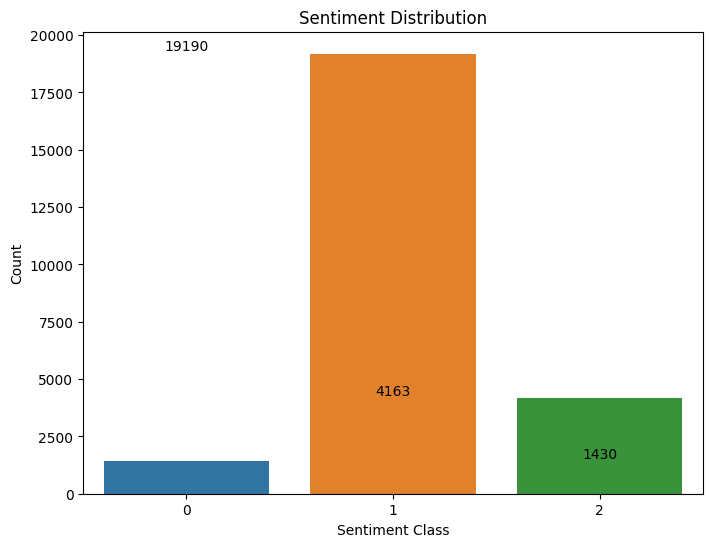

Sentiment Counts:
class
1    19190
2     4163
0     1430
Name: count, dtype: int64


In [8]:
sentiment_counts = df['class'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# Annotating each bar with its count
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

print("Sentiment Counts:")
print(sentiment_counts)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


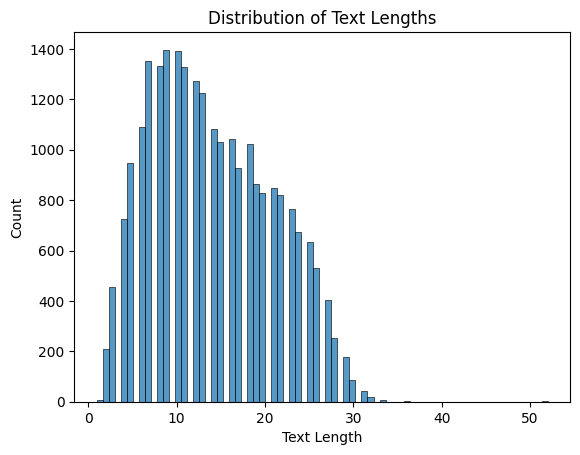

Text Length Counts:
text_length
9     1397
10    1392
7     1354
8     1331
11    1328
12    1271
13    1225
6     1089
14    1082
16    1042
15    1029
18    1023
5      949
17     926
19     863
21     850
20     827
22     822
23     764
4      724
24     672
25     634
26     529
3      454
27     403
28     251
2      209
29     177
30      88
31      43
32      19
1        8
33       6
36       1
52       1
Name: count, dtype: int64


In [12]:
df['text_length'] = df['tweet'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Print the numbers
text_length_counts = df['text_length'].value_counts()
print("Text Length Counts:")
print(text_length_counts)


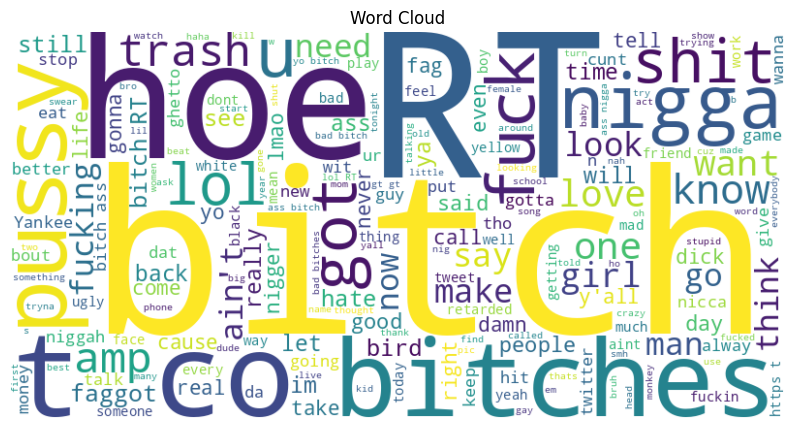

In [11]:
from wordcloud import WordCloud

text = ' '.join(df['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [13]:
# Get a concise summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   text_length         24783 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.5+ MB
None


In [14]:
# Descriptive statistics for numerical columns
print(df.describe())


         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class   text_length  
count  24783.000000  24783.000000  24783.000000  
mean       0.549247      1.110277     14.117016  
std        1.113299      0.462089      6.825525  
min        0.000000      0.000000      1.000000  
25%        0.000000      1.000000      9.000000  
50%        0.000000      1.000000     13.000000  
75%       

In [16]:
# Count unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unnamed: 0: 24783 unique values
count: 5 unique values
hate_speech: 8 unique values
offensive_language: 10 unique values
neither: 10 unique values
class: 3 unique values
tweet: 24783 unique values
text_length: 35 unique values


# Dataset Description

## Overview
The dataset under investigation comprises tweets collected for the purpose of hate speech and offensive language identification. The primary focus is to categorize tweets into three distinct sentiment classes: hate speech (class 0), offensive language (class 1), and neither (class 2). The dataset includes a total of 24,783 entries, each annotated based on the content of the tweet.

## Attributes
The dataset contains the following attributes for each tweet:

- **Unnamed: 0**: A unique identifier for each entry in the dataset.
- **Count**: The number of annotators who reviewed the tweet. This attribute reflects the level of agreement or certainty among annotators regarding the assigned class.
- **Hate Speech**: The number of annotators who classified the tweet as hate speech.
- **Offensive Language**: The number of annotators who identified the tweet as containing offensive language.
- **Neither**: The number of annotators who believed the tweet did not contain hate speech or offensive language.
- **Class**: A categorical variable representing the consensus classification of the tweet (0 = hate speech, 1 = offensive language, 2 = neither).
- **Tweet**: The text content of the tweet itself.
- **Text Length**: The number of words in the tweet, derived as an additional attribute to explore the distribution and impact of text length on the classification.

## Data Distribution
The distribution of classes is significantly skewed:

- Offensive Language (Class 1) accounts for the majority of the dataset with 19,190 entries.
- Neither (Class 2) follows with 4,163 entries.
- Hate Speech (Class 0) is the least represented with only 1,430 entries.

The distribution of text lengths shows that most tweets are concise, typically ranging between 5 and 20 words, aligning with the platform’s character limit constraints. This attribute's analysis is crucial as it might influence the classifier's performance, given that shorter texts provide less contextual information.

## Statistical Summary
The dataset's attributes primarily consist of integer counts, with descriptive statistics indicating the following:

- Mean text length is approximately 14 words.
- The median values for hate speech, offensive language, and neither are skewed towards fewer annotations agreeing on hate speech, with most tweets being identified as offensive language by at least three annotators.
- There is variability in the number of annotators per tweet, indicating differing levels of agreement or certainty in classifications.

## Data Preparation
The dataset required minimal preprocessing for missing values, as there were no null entries across all attributes. Text data preprocessing included standardization practices such as lowercasing, removing non-alphanumeric characters, and tokenization to prepare for further natural language processing tasks.

## Conclusion
This dataset provides a rich source for analyzing and modeling sentiment classification tasks, particularly in the context of social media language use. Its imbalanced nature poses challenges and opportunities for developing robust models to accurately classify nuanced human language.
